In [1]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업하고 있는 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/deeplearning_2025

/content/drive/MyDrive/Colab Notebooks/deeplearning_2025


# 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 구현해보자

In [3]:
# 데이터 분석에 필요한 라이브러리 3대장
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [5]:
# 데이터 로딩
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# 크기 확인
print("훈련 데이터 :", X_train.shape, y_train.shape)
print("테스트 데이터 :", X_test.shape, y_test.shape)

# 6만건의 훈련데이터와 만건의 테스트 데이터 확인
# 한장당 가로 28px, 세로 28px 이미지 데이터로 생겼다는 것을 확인할 수 있다.
# 1차원으로 들어가있는 것을 확인할 수 있다.

훈련 데이터 : (60000, 28, 28) (60000,)
테스트 데이터 : (10000, 28, 28) (10000,)


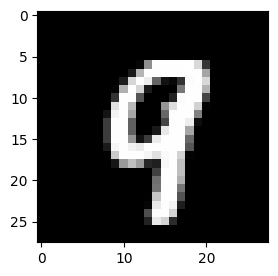

In [10]:
# X 데이터 확인
plt.figure(figsize=(3, 3))
plt.imshow(X_train[800], cmap = 'gray')
plt.show()
# 28개의 픽셀에서 하나의 픽셀당 0 ~ 255 까지의 값이 매겨져있고,
# 0은 검은색, 255는 흰색을 나타냄

In [11]:
# y 데이터 확인 (800번째 숫자가 진짜 9인지 확인)
y_train[800]

np.uint8(9)

### MLP 모델링

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten

# Flatten :
# 2차원 데이터를 곱게 펴주는 것
# 2차원의 이미지 데이터(28, 28)를 1차원으로 출력해주는 클래스

In [14]:
# 1. MLP 모델 설계

# 뼈대 설계
model = Sequential()

# 입력층 설계 --> 데이터셋의 모양이 (28, 28)형태로 생겼기 때문에 shape도 (28, 28)로 해줘야한다.
model.add(InputLayer(input_shape=(28, 28)))

# 은닉층 설계 --> 은닉층 맨 위에 model.add(Flatten()) 부터 사용
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))

# 출력층 설계
model.add(Dense(10, activation='softmax'))
# softmax : 클래스 각각의 확률 값을 반환하는 함수

# 데이터를 받을때 1차원 형태로밖에 받는다. flatten으로 펴준다.

In [15]:
# 2. 학습 방법 설정
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics = ['accuracy']
)

In [16]:
# 3. 학습
h = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5212 - loss: 1.6254 - val_accuracy: 0.8387 - val_loss: 0.5808
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8234 - loss: 0.5901 - val_accuracy: 0.8323 - val_loss: 0.5339
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8426 - loss: 0.5157 - val_accuracy: 0.8776 - val_loss: 0.4107
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8630 - loss: 0.4439 - val_accuracy: 0.8747 - val_loss: 0.4222
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8640 - loss: 0.4369 - val_accuracy: 0.8847 - val_loss: 0.3815
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8821 - loss: 0.3832 - val_accuracy: 0.8946 - val_loss: 0.3556
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8887 - loss: 0.3624 - val_accuracy: 0.8857 - val_loss: 0.3627
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8868 - loss: 0.365

In [21]:
# 1. MLP 모델 설계 (sigmoid -> relu)

# 뼈대 설계
model = Sequential()

# 입력층 설계 --> 데이터셋의 모양이 (28, 28)형태로 생겼기 때문에 shape도 (28, 28)로 해줘야한다.
model.add(InputLayer(input_shape=(28, 28)))

# 은닉층 설계 --> 은닉층 맨 위에 model.add(Flatten()) 부터 사용
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력층 설계
model.add(Dense(10, activation='softmax'))
# softmax : 클래스 각각의 확률 값을 반환하는 함수

# 데이터를 받을때 1차원 형태로밖에 받는다. flatten으로 펴준다.

In [22]:
# 2. 학습 방법 설정
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics = ['accuracy']
)

In [19]:
# 3. 학습
h = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5632 - loss: 2.8423 - val_accuracy: 0.8632 - val_loss: 0.4796
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8837 - loss: 0.4308 - val_accuracy: 0.9206 - val_loss: 0.2967
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9161 - loss: 0.3091 - val_accuracy: 0.9235 - val_loss: 0.2736
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9260 - loss: 0.2693 - val_accuracy: 0.9303 - val_loss: 0.2409
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9317 - loss: 0.2397 - val_accuracy: 0.9371 - val_loss: 0.2308
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9385 - loss: 0.2147 - val_accuracy: 0.9358 - val_loss: 0.2353
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9453 - loss: 0.1940 - val_accuracy: 0.9473 - val_loss: 0.1902
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9494 - loss: 0.179

In [ ]:
# sigmoid에서 relu로 바꾸니까 accuracy가 올라갔다.

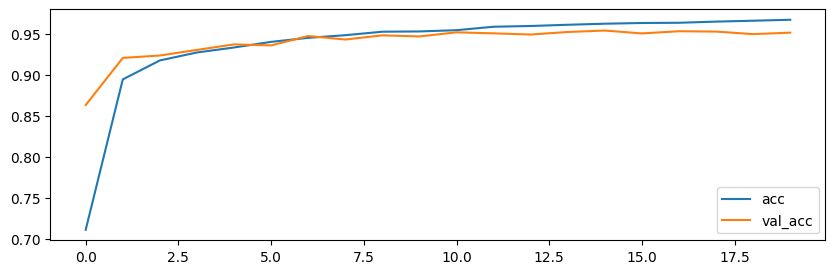

In [24]:
# 4. 평가(모델의 복잡도 곡선)
plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [26]:
# acc - train data (60,000건의 데이터)
# val_acc - test data (10,000건의 데이터)
# train에 대한 정확도가 굉장히 높게나왔다.
# test에 대한 정확도는 더이상 개선되지 않을 것으로 보인다.
# => 과대 적합 (소개팅 사진을 과대하게 학습한 나머지 실물을 보고 실망함. 학습도 적당히 해야됨.)

# 정리:
# 7번째 epoch 이후에 train acc는 점점 높아지는데 비해, val acc는 성능개선이 이루어지지 않고 있다.
# --> 과대적합이 의심된다.
# 과대적합을 해소하기 위해서 콜백함수(조기학습중단과 모델중간저장)를 통해 완화시켜보자.

In [27]:
# 모델 불러오기 -> 2024년부터 keras에 모델 저장 확장자가 생김
from tensorflow.keras.models import load_model

In [28]:
# 모델 저장 후 불러오는 간단한 코드
model.save('hand_model.keras')

In [29]:
loaded_model = load_model('hand_model.keras')

In [32]:
# 경로에 모델이 저장됨
# 성능이 좋은 모델만 남김
# 25시간동안 모델을 돌려도 코랩을 끄면 다시 실행을 해야하니까, 저장을 해놓는 것

In [31]:
loaded_model.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(1)

In [33]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [34]:
# 과대적합을 방지할 수 있는 도구를 사용해보자
# 조기학습중단(Early Stopping) : Epoch 중간에 성능이 더이상 개선되지 않는 경우, 학습을 멈추는 기능
# 중간에 모델을 저장하는 기능(ModelCheckPoint) : 좋았던 모델(모든 모델)들을 저장하는 기능
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
# 저장하는 과정에서 모델 파일명이 같으면 덮어씌워지기 때문에
# 파일명을 다르게 하여 저장.

model_path = 'hand_model-{epoch:03d}-{val_accuracy:.4f}.keras'

In [40]:
# 모델 체크포인트 정의
mcp = ModelCheckpoint(
    model_path,
    monitor = 'val_accuracy', # 모니터링 할 기준
    verbose = 1,              # 과정을 출력? True
    save_best_only = True     # 나아진 결과에 대해서만 저장, 만약 False로하면 모든 epoch마다 모델을 저장하게됨
)

In [41]:
# 조기학습중단 정의 --> 모델 학습에 걸리는 시간을 단축시켜주는 역할을 한다.
early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,     # 전보다 나아지지 않아도 실행하는 횟수
    verbose = 1
)

In [42]:
# 1. MLP 모델 설계
# 뼈대 설계
model = Sequential()

# 입력층 설계 --> 데이터셋의 모양이 (28, 28)형태로 생겼기 때문에 shape도 (28, 28)로 해줘야한다.
model.add(InputLayer(input_shape=(28, 28)))

# 은닉층 설계 --> 은닉층 맨 위에 model.add(Flatten()) 부터 사용
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력층 설계
model.add(Dense(10, activation='softmax'))
# softmax : 클래스 각각의 확률 값을 반환하는 함수

# 데이터를 받을때 1차원 형태로밖에 받는다. flatten으로 펴준다.

# 2. 학습 방법 설정
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics = ['accuracy']
)

# 3. 학습
h = model.fit(
    X_train,
    y_train,
    epochs = 50,                        # epoch를 넉넉하게 지정
    validation_data = (X_test, y_test), # 모니터링할 때 사용될 검증
    callbacks = [early_stop, mcp]       # 콜백함수 셋팅
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 2.6807
Epoch 1: val_accuracy improved from -inf to 0.89050, saving model to hand_model-001-0.8905.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6346 - loss: 2.6798 - val_accuracy: 0.8905 - val_loss: 0.3980
Epoch 2/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8970 - loss: 0.3720
Epoch 2: val_accuracy improved from 0.89050 to 0.91310, saving model to hand_model-002-0.9131.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8970 - loss: 0.3719 - val_accuracy: 0.9131 - val_loss: 0.3339
Epoch 3/50
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9244 - loss: 0.2710
Epoch 3: val_accuracy improved from 0.91310 to 0.93340, saving model to hand_model-003-0.9334.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9244 - loss: 0.2710 - val_accuracy: 0.9334 - val_loss: 0.2597
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9343 - loss: 

In [43]:
loaded_model = load_model('hand_model-018-0.9622.keras')

In [44]:
loaded_model.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

### 모델의 성능을 직접 확인하기 위해 손글씨 데이터를 넣고 예측 수행해보기

In [47]:
import PIL.Image as pimg
img = pimg.open('./data/hand_writing.gif')

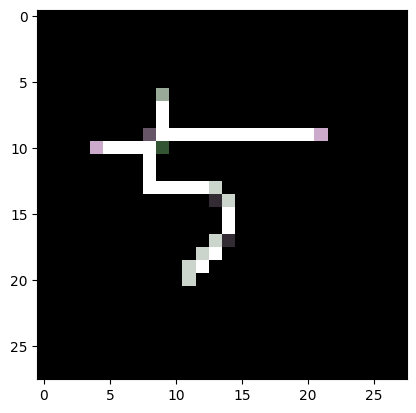

In [48]:
plt.imshow(img)
plt.show()

In [49]:
num = np.array(img)
num
# 차원 수정
num = num.reshape(1, 28, 28)

In [50]:
# 96%의 정확도로 이루어진 모델이 내가 쓴 손글씨를 잘 예측하는지 확인해본다.
loaded_model.predict(num)[0].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


np.int64(5)

In [51]:
# mlp의 한계
# px값을 가져다가 예측을 함
# 다음은 CNN을 통해서 해볼 예정